# EDA cho dữ liệu Pima Indians Diabetes (UCI)
Notebook này thực hiện phân tích khám phá dữ liệu (EDA) trên bộ dữ liệu Pima Indians Diabetes, theo chuẩn chẩn đoán tiểu đường WHO. Nội dung gồm:
- Xem thông tin dữ liệu
- Phân tích đơn biến
- Phân tích đa biến
- Kiểm tra giá trị thiếu
- Phát hiện ngoại lệ

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## Đọc dữ liệu

In [15]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv("pima-indians-diabetes.csv", header=None, names=columns)

## Thông tin dữ liệu

In [16]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Kiểm tra giá trị thiếu

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Phân tích đơn biến

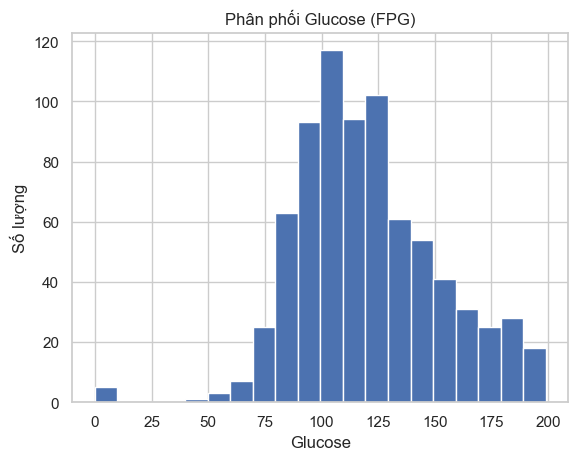

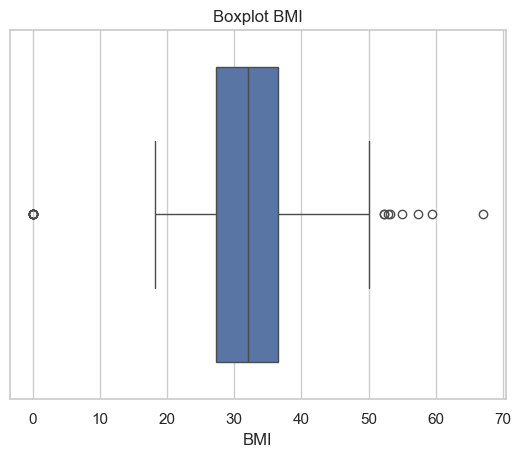

In [18]:
df['Glucose'].hist(bins=20)
plt.title('Phân phối Glucose (FPG)')
plt.xlabel('Glucose')
plt.ylabel('Số lượng')
plt.show()

sns.boxplot(x=df['BMI'])
plt.title('Boxplot BMI')
plt.show()

## Phân tích đa biến

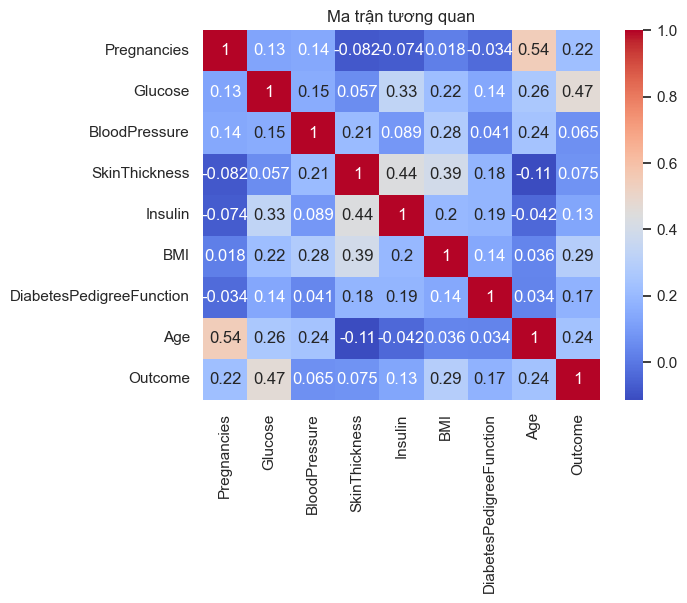

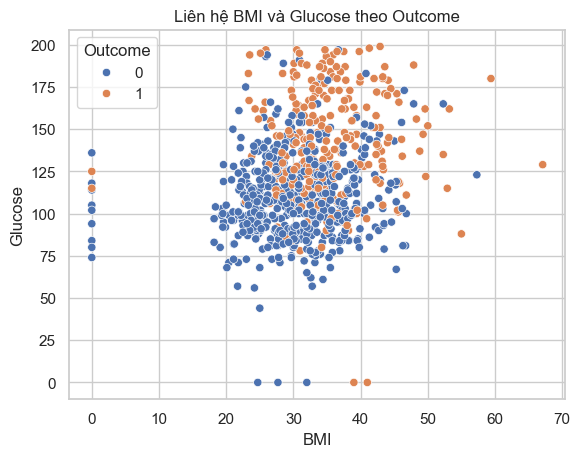

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df)
plt.title('Liên hệ BMI và Glucose theo Outcome')
plt.show()

## Phát hiện ngoại lệ (IQR)

In [20]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Glucose'] < Q1 - 1.5*IQR) | (df['Glucose'] > Q3 + 1.5*IQR)]
print('Số lượng ngoại lệ Glucose:', len(outliers))
outliers.head()

Số lượng ngoại lệ Glucose: 5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


## Kết luận
- FPG (Glucose) và OGTT là chỉ số chính để chẩn đoán tiểu đường theo WHO.
- BMI có mối liên hệ với nguy cơ mắc tiểu đường Type 2.
- Dữ liệu có thể có missing và outliers, cần xử lý trước khi phân tích nâng cao.
- EDA cung cấp cơ sở để xây dựng mô hình dự đoán.